In [1]:
import os
os.chdir("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset")

In [17]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Natural Language Processing

# Importing the libraries
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('labeledTrainData.tsv', sep = '\t')


In [4]:
dataset.head(5)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [5]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stops = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, dataset.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stops)]
    review = ' '.join(review)
    corpus.append(review)



###############Understanding the loop############
#=============================================================================
i = 34
review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
review = review.lower()
review = review.split()
ps = PorterStemmer()
review = [ps.stem(word) for word in review 
          if not word in set(stops)]
review = ' '.join(review)
corpus.append(review)
#=============================================================================
#################################################


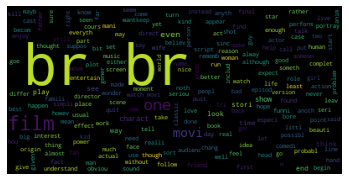

In [7]:
# Generating Word Cloud
corp_str = str(corpus)
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(relative_scaling=1.0).generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
    


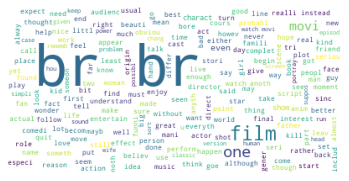

In [8]:
### to customize the stopwords ##
from wordcloud import STOPWORDS
mystopwrds = set(STOPWORDS)
mystopwrds.add("food")
wc = WordCloud(stopwords=mystopwrds,relative_scaling=1.0,
               background_color="white")
wordcloud = wc.generate(corp_str)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [9]:
##################################################

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X,columns=cv.get_feature_names())
y = dataset.iloc[:, 1]

In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [11]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [12]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [13]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      2548
           1       0.81      0.65      0.72      2452

    accuracy                           0.75      5000
   macro avg       0.77      0.75      0.75      5000
weighted avg       0.76      0.75      0.75      5000

0.7548


In [18]:
RandomForest = RandomForestClassifier(random_state=2021)
xgbr = XGBClassifier(random_state=2021)

In [19]:
RandomForest.fit(X_train, y_train)
xgbr.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:42:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [20]:
#RandoForest
y_pred = RandomForest.predict(X_test)

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2548
           1       0.83      0.83      0.83      2452

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

0.8372


In [21]:
#xgboost
y_pred = xgbr.predict(X_test)

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      2548
           1       0.84      0.88      0.86      2452

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

0.857


In [22]:
####################################################################################
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
X = pd.DataFrame(X,columns=cv.get_feature_names())
y = dataset.iloc[:, 1]

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [24]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [25]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      2548
           1       0.80      0.82      0.81      2452

    accuracy                           0.81      5000
   macro avg       0.81      0.81      0.81      5000
weighted avg       0.81      0.81      0.81      5000

0.8122


In [27]:
RandomForest.fit(X_train, y_train)
xgbr.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:43:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              random_state=2021, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [28]:
#RandomForest
y_pred = RandomForest.predict(X_test)

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2548
           1       0.84      0.84      0.84      2452

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000

0.8408


In [29]:
#xgboost
y_pred = xgbr.predict(X_test)

confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      2548
           1       0.83      0.87      0.85      2452

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000

0.8526
